# Titanic Competition

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Importar data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

# Exploratory Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

## Data Dimentions

In [5]:
print(f"Dimensiones: [Train: {train.shape}, Test: {test.shape}, Submission: {sub.shape}]")

Dimensiones: [Train: (891, 12), Test: (418, 11), Submission: (418, 2)]


## Data Information

## train.info()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Las variables edad "Age" y tarifa "Fare" tiene valores faltantes, los cuales más adelante se tratará 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Notice:
- We can see that there is some missing values in the data. So we have to handle it later.

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Ploting libraries

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

# Male vs Female in dataset

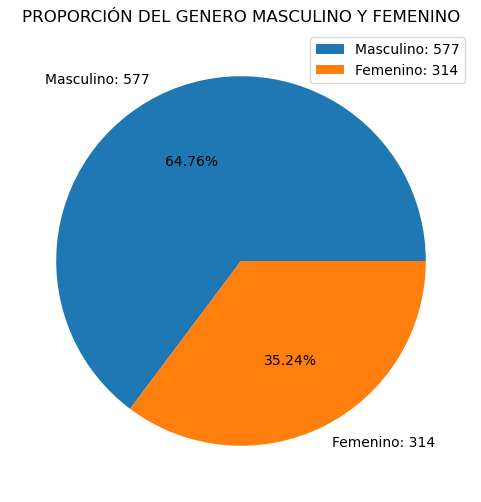

In [10]:
# Crear las variables contenedoreas para poder colocarles % y conteo a las graficcas 
masculino = train['Sex'].value_counts()[0]
femenino= train['Sex'].value_counts()[1]

# Crear grafica 
plt.figure(figsize=(6, 6))
plt.pie([masculino, femenino],labels=['Masculino: '+str(masculino), 'Femenino: '+str(femenino)], autopct="%.2f%%")
plt.title("PROPORCIÓN DEL GENERO MASCULINO Y FEMENINO")
plt.legend()
plt.show()

Nota:
- La proporción del genero masculino es mayor al femenino, lo cual es esperado, teniendo en cuenta que se requerian muchs marineros y rabajadores en el barco 

# Validación de datos

## Datos faltantes 

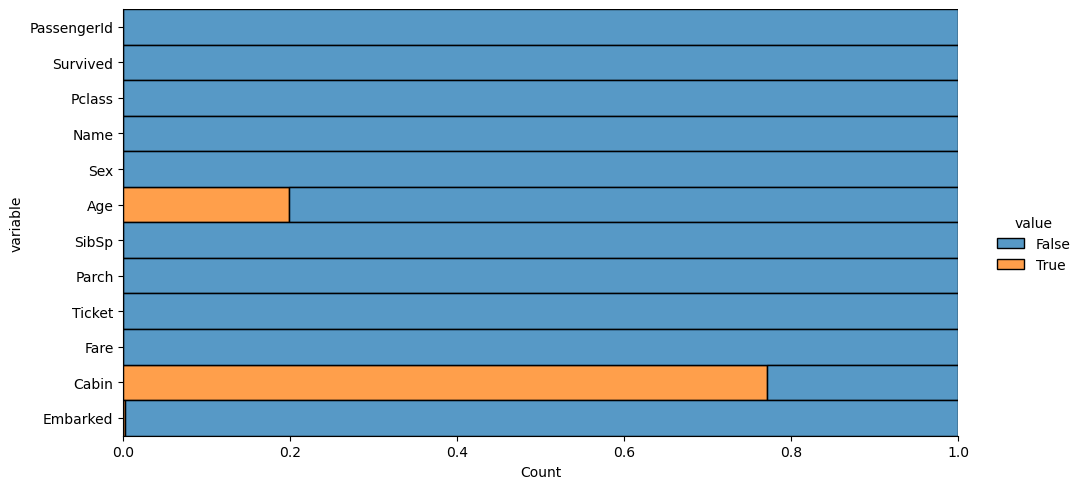

In [11]:
# Explrar graficamente el data frame 
(
    train
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data= df,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
)
plt.show()

Notice:
* Alrededr de un 20% de las edades de los pasajeros se han perdido
* Casi un 80% de los pasajeros no tienen registro en cuanto a su cabina designada 

## distrubucion

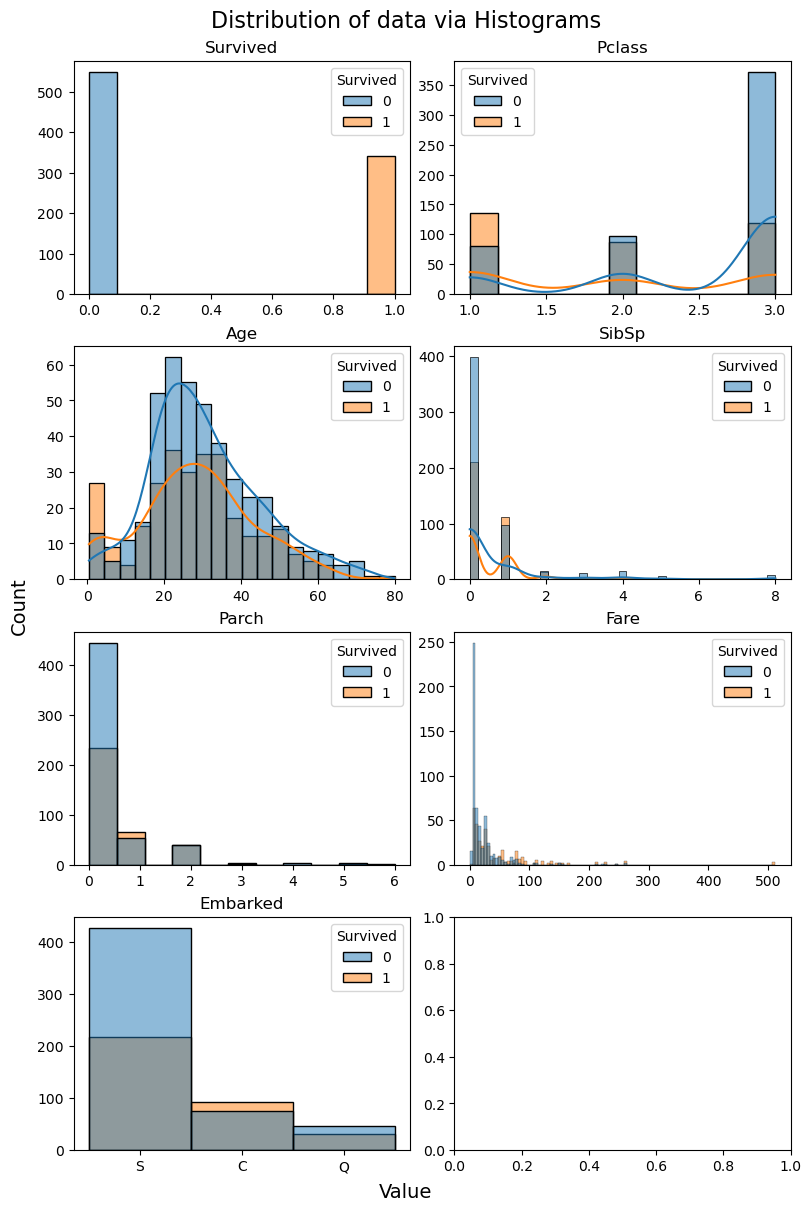

In [12]:
fig, axs = plt.subplots(4, 2, figsize = (8,12), constrained_layout=True) 
index = []
cols = ['Survived','Pclass','Age', 'SibSp','Parch','Fare', 'Embarked'] 
for i in range(4):
    for j in range(2):
        index.append(axs[i][j])
for i in range(len(cols)):
    if i == 1 or i == 2 or i == 3:
        sns.histplot(
            data=train, x=cols[i], kde=True, ax=index[i], hue=train.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)
    else:
        sns.histplot(
            data=train, x=cols[i], kde=False, ax=index[i], hue=train.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)

fig.supxlabel("Value").set_fontsize(14)
fig.supylabel("Count").set_fontsize(14)
fig.suptitle("Distribution of data via Histograms").set_fontsize(16)

Notas:
* La mayoría de los pasajeros de set de entrenamiento sobrevivieron
* La clase 3 es la que posee menor probabilidad de supervivencia
* La edad tiene un distribución normal normal
* Los pasajeros que abordaron el titanic en Southampton tienen tienden a sobrevivir con menor freciencia, respecto al resto de puertos

# Imputación de datos 

## imputación basica de datos

In [13]:
# se hace una copia de la data train para manipularla mas adelante
from copy import deepcopy

data = deepcopy(train)

In [14]:
def inputar_data(data):
    """
    replaza los datos faltantes de edad por la media
    replaza los datos faltantes en Fare "tarifa"
    """
    cols = ["Age", "Fare"]
    for col in cols:
        data[col].fillna(data[col].mean(), inplace = True)
    """
    replaza los datos faltantes en Embarque
    """
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    return data

In [15]:
# Se aplica la funcion a la data trein y test a fin de transformar la data homogéneamente 
inputar_data(data)
inputar_data(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Como se puede apreciar ya no hay existen datos faltantes en las variables age y Embarked 

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Como se puede apreciar, la imputación de data fue exitosa en cada set, dando la oportunidad de imputar los datos de forma sistemática, evitando posibles errores, al utilizar un método homogéneo. 

# Transformación de los datos utilizando funciones avanzadas

In [18]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [20]:
import pandas as pd
import numpy as np

def transform_titanic_data(df):
    # Copiar el dataframe para no modificar el original
    transformed_df = df.copy()
    
    # 1. La variable de género se codifica como 1 para hombres y 0 para mujeres
    transformed_df['Sex'] = np.where(transformed_df['Sex'] == 'male', 1, 0)
    
    # 2. La variable edad se estratifica en las categorías especificadas
    transformed_df['Age'] = np.where(transformed_df['Age'] < 20, 0, 
                                     np.where(transformed_df['Age'] < 40, 1,
                                              np.where(transformed_df['Age'] < 60, 2, 3)))
    
    # 3. La variable que indica si el pasajero viaja acompañado o no se crea a partir de la variable SibSp
    transformed_df['Accompanied'] = np.where(transformed_df['SibSp'] + transformed_df['Parch'] > 0, 1, 0)
    
    # 4. La variable que indica si un niño viaja con su nana o no se crea a partir de la variable Parch
    transformed_df['Nanny'] = np.where((transformed_df['Age'] < 18) & (transformed_df['Parch'] > 0), 0, 1)
    
    # 5. La variable que indica si el número de ticket es numérico o no se crea a partir de una expresión regular
    transformed_df['Ticket'] = np.where(transformed_df['Ticket'].str.contains('\d'), 1, 0)
    
    # Eliminar las variables originales que ya no se necesitan
    transformed_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    
    return transformed_df


In [21]:
transform_titanic_data(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Accompanied,Nanny
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1,1,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",1,1,1,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1,1,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,1,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,3,1,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,1,1,30.0000,C148,C,0,1


In [22]:
import re

# Carga el archivo csv en un dataframe
df = data

In [23]:
# Extraer los títulos de la columna de nombres usando una expresión regular
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

# Imprimir los títulos de cada persona
print(df['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


In [24]:
# We will use this function to get the title of the people on the titanic like (Captain, Doctor, ...) 
def spliter(name):
    tokens = name.split(', ')
    ppl_kind = tokens[1].split('.')[0]
    
    return ppl_kind

In [25]:
import pandas as pd
import re

# cargar el conjunto de datos del Titanic
titanic_data = data

# definir la expresión regular para buscar los títulos
title_regex = re.compile(r"\b([A-Za-z]+)\.")

# crear una nueva columna para los títulos
titanic_data["Title"] = titanic_data["Name"].apply(lambda x: re.search(title_regex, x).group(1))

# imprimir los títulos de los primeros 10 pasajeros
print(titanic_data["Title"].head(10))


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object


In [26]:
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

# Encoding Binario

Esta técnica no es canónica por lo que tendremos que buscarla en otra librería.<br>
Sin embargo el autor tuvo la buena idea de hacer su API compatible con la de sklearn, así que no tendremos ninguna dificultad en usarla.<br>

$$ Categoria \rightarrow Numero \rightarrow Binario \rightarrow Columnas $$

In [28]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [40]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Cabin', 'Embarked']) # las columnas que se van a transformar 

In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
encoder = encoder.fit_transform(train)

In [48]:
encoder

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,1,0,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,1,0,0,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,1,0,1,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,1,1,0,1,0
